Notebook to plot the group-level activation for both contrasts (Look Negative vs Look Neutral and Regulate Negative vs Look Negative). We also computed the clusters features (number of voxels and position of the maximum peak) emerging from these (thresholded) maps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from os.path import join as opj
from nilearn import glm, plotting, image
import os
from pathlib import Path
from nilearn.regions import connected_regions
from nilearn.plotting import surf_plotting
from nilearn import datasets

/home/javi/.local/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/home/javi/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


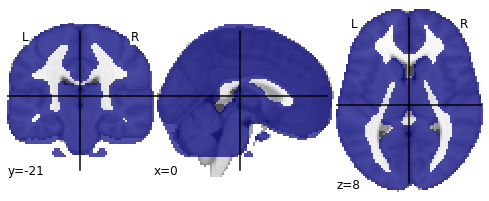

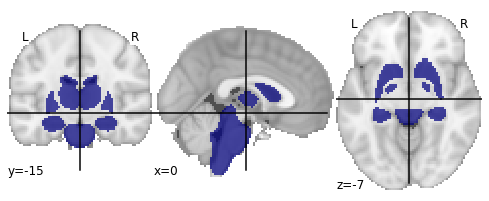

In [2]:
mask_img = "../data/reslicedER_grey25grey25.nii"
plotting.plot_roi(mask_img)

views = ["lateral", "medial", "dorsal", "ventral", "anterior", "posterior"]
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
low_fsaverage = datasets.fetch_surf_fsaverage('fsaverage5')

mask_subc_img = image.resample_to_img("/usr/local/fsl/data/standard/MNI152_T1_1mm_subbr_mask.nii.gz", 
                                      mask_img, interpolation="nearest")
plotting.plot_roi(mask_subc_img)

# LOOK NEGATIVE vs LOOK NEUTRAL

In [3]:
t_map_0001_thr = image.load_img(opj("../results/group-level-maps",
                                    "lookNeg_vs_lookNeut", 
                                    "lookNeg_vs_lookNeut_fdr05.nii.gz")
                               )

vmax_0001 = np.max(np.abs(t_map_0001_thr.get_fdata()))
print(" maximum (absolute) T value %.3f" % vmax_0001)


output_dir = Path("../plots/activation_maps/lookNeg_vs_lookNeut")
output_dir.mkdir(exist_ok=True, parents=True)
output_dir = output_dir.absolute().as_posix()

 maximum (absolute) T value 16.261


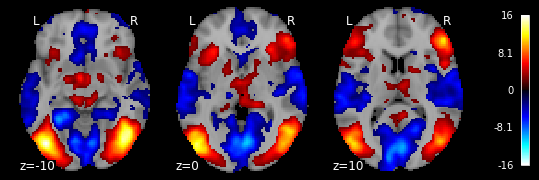

In [5]:
fig = plotting.plot_stat_map(t_map_0001_thr, display_mode="z", 
                             cut_coords=(-10,0, 10), 
                             colorbar=True, 
                             black_bg=True,
                             annotate=True, vmax=vmax_0001)

fig.savefig(opj(output_dir, "axial_cuts_fdr_05_black.png"), dpi=300)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05_black.pdf"), dpi=300)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05_black.svg"), dpi=300)

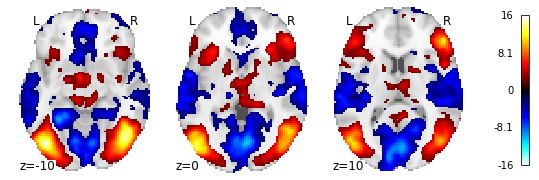

In [4]:
fig = plotting.plot_stat_map(t_map_0001_thr, display_mode="z", 
                             cut_coords=(-10,0, 10), 
                             colorbar=True, 
                             annotate=True, vmax=vmax_0001)

fig.savefig(opj(output_dir, "axial_cuts_fdr_05.png"), dpi=300)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05.pdf"), dpi=300)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05.svg"), dpi=300)

In [5]:
# Save surface plots (pngs, in high resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(t_map_0001_thr, big_fsaverage.pial_left)
        surf_mesh = big_fsaverage.infl_left
        bg_map = big_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(t_map_0001_thr, big_fsaverage.pial_right)
        surf_mesh = big_fsaverage.infl_right
        bg_map = big_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_fdr_05.png"
        output_file = output_dir + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    threshold=2., bg_map=bg_map, 
                                    vmax=vmax_0001,
                                    figure=fig, output_file=output_file)

In [6]:
# Save surface plots (svg, in lower resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(t_map_0001_thr, low_fsaverage.pial_left)
        surf_mesh = low_fsaverage.infl_left
        bg_map = low_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(t_map_0001_thr, low_fsaverage.pial_right)
        surf_mesh = low_fsaverage.infl_right
        bg_map = low_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_fdr_05.svg"
        output_file = output_dir + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    threshold=2., bg_map=bg_map, 
                                    vmax=vmax_0001,
                                    figure=fig, output_file=output_file)

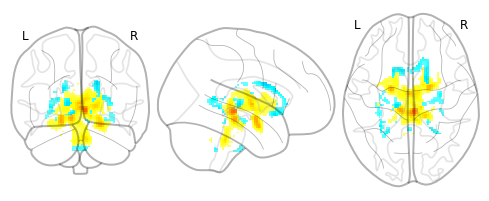

In [7]:
fig = plotting.plot_glass_brain(image.math_img("img1*img2", 
                                               img1=t_map_0001_thr, 
                                               img2=mask_subc_img),
                                colorbar=False, plot_abs=False, vmax=vmax_0001, 
                                alpha=0.3)

fig.savefig(opj(output_dir, "subcortical_glass_fdr_05.png"), dpi=300)
fig.savefig(opj(output_dir, "subcortical_glass_fdr_05.pdf"), dpi=300)
fig.savefig(opj(output_dir, "subcortical_glass_fdr_05.svg"), dpi=300)


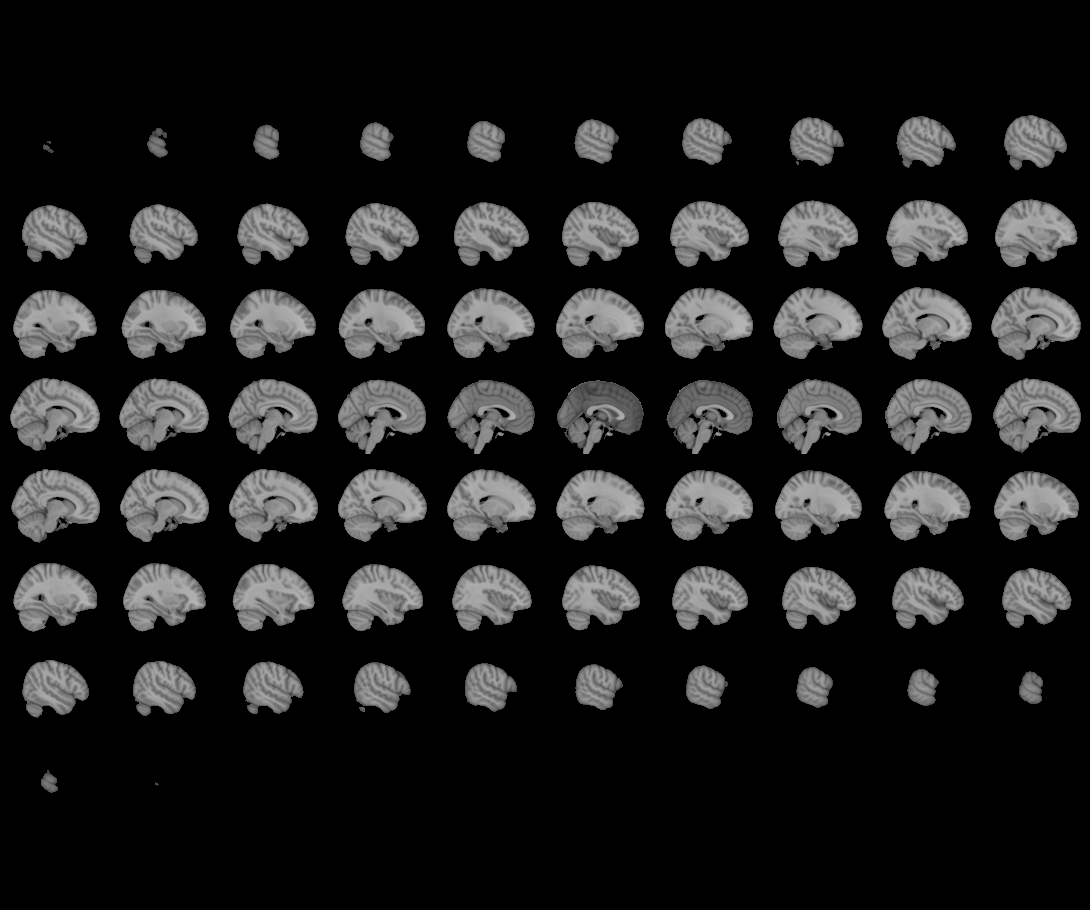
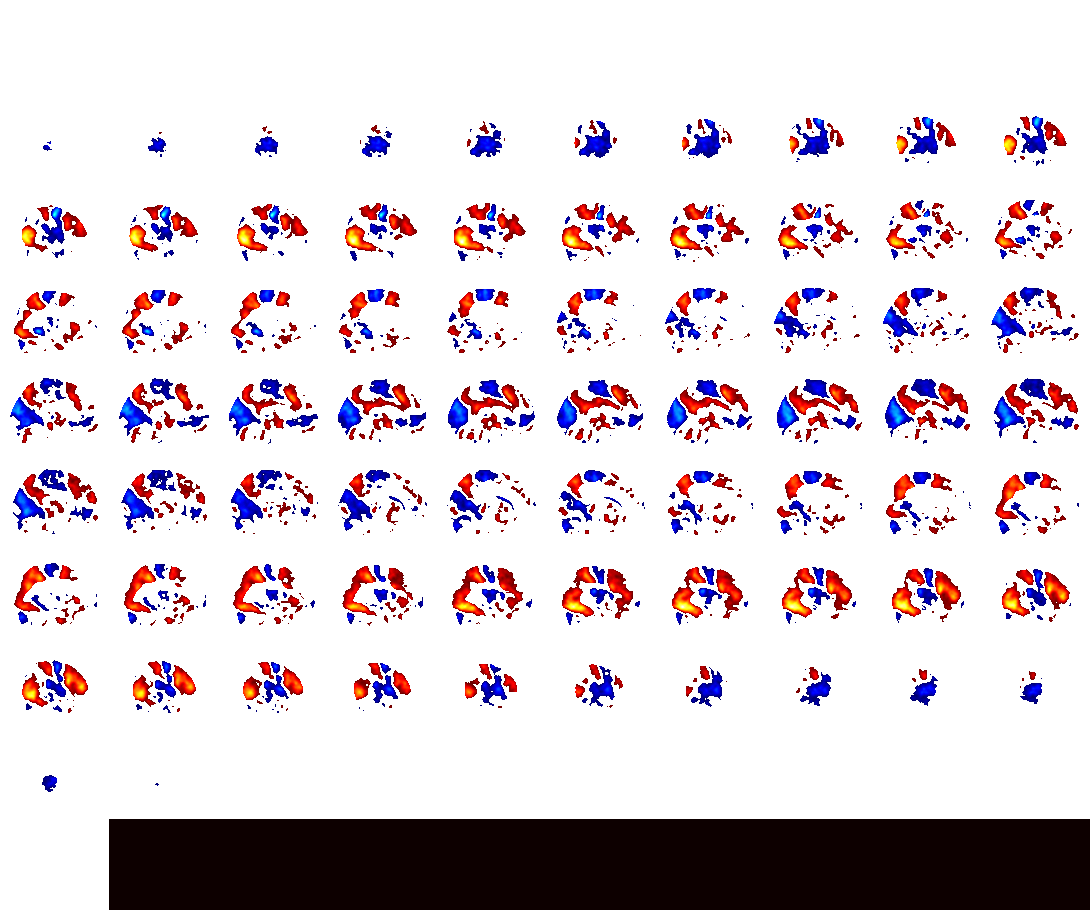

In [8]:
plotting.view_img(t_map_0001_thr)

# REGULATE NEGATIVE vs LOOK NEGATIVE

In [13]:
t_map_0002_thr = image.load_img(opj("../results/group-level-maps/RegNeg_vs_lookNeg", 
                                    "stat_fdr05.nii.gz"))

vmax_0002 = np.max(np.abs(t_map_0002_thr.get_fdata()))
print(" maximum (absolute) T value %.3f" % vmax_0002)

output_dir = Path("../plots/activation_maps/RegNeg_vs_lookNeg")
output_dir.mkdir(exist_ok=True, parents=True)
output_dir = output_dir.absolute().as_posix()

 maximum (absolute) T value 7.348


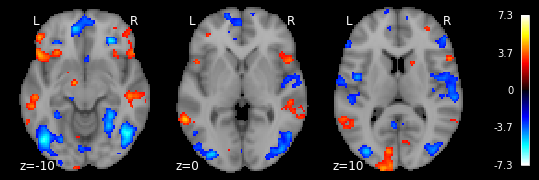

In [14]:
fig = plotting.plot_stat_map(t_map_0002_thr, display_mode="z", cut_coords=(-10,0, 10), 
                             colorbar=True,
                             black_bg=True,
                             annotate=True, vmax=vmax_0002)

fig.savefig(opj(output_dir, "axial_cuts_fdr_05_black.png"), dpi=600)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05_black.pdf"), dpi=600)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05_black.svg"), dpi=600)

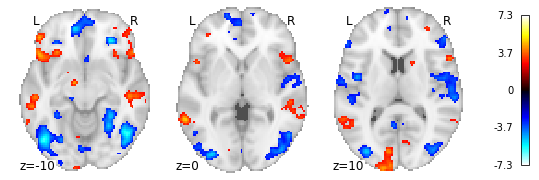

In [10]:
fig = plotting.plot_stat_map(t_map_0002_thr, display_mode="z", cut_coords=(-10,0, 10), 
                             colorbar=True,
                             annotate=True, vmax=vmax_0002)

fig.savefig(opj(output_dir, "axial_cuts_fdr_05.png"), dpi=600)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05.pdf"), dpi=600)
fig.savefig(opj(output_dir, "axial_cuts_fdr_05.svg"), dpi=600)

In [11]:
# Save surface plots (pngs, in high resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(t_map_0002_thr, big_fsaverage.pial_left)
        surf_mesh = big_fsaverage.infl_left
        bg_map = big_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(t_map_0002_thr, big_fsaverage.pial_right)
        surf_mesh = big_fsaverage.infl_right
        bg_map = big_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_fdr_05.png"
        output_file = output_dir + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    threshold=2., bg_map=bg_map, 
                                    vmax=vmax_0002,
                                    figure=fig, output_file=output_file)

In [12]:
# Save surface plots (svg, in lower resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(t_map_0002_thr, low_fsaverage.pial_left)
        surf_mesh = low_fsaverage.infl_left
        bg_map = low_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(t_map_0002_thr, low_fsaverage.pial_right)
        surf_mesh = low_fsaverage.infl_right
        bg_map = low_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_fdr_05.svg"
        output_file = output_dir + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    threshold=2., bg_map=bg_map, 
                                    vmax=vmax_0002,
                                    figure=fig, output_file=output_file)

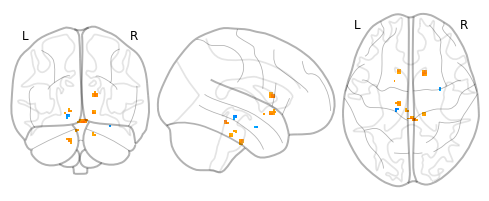

In [13]:
fig = plotting.plot_glass_brain(image.math_img("img1*img2", 
                                               img1=t_map_0002_thr, 
                                               img2=mask_subc_img),
                                colorbar=False, plot_abs=False, vmax=vmax_0002, 
                                alpha=0.3)

fig.savefig(opj(output_dir, "subcortical_glass_fdr_05.png"), dpi=600)
fig.savefig(opj(output_dir, "subcortical_glass_fdr_05.pdf"), dpi=600)
fig.savefig(opj(output_dir, "subcortical_glass_fdr_05.svg"), dpi=600)